In [2]:
# Shahlo Solieva
# Analysis of I467T vs WT simulations

In [3]:
pwd

'/Users/ssolieva/Desktop/bowman_lab/MSM_I467T/contacts_data'

In [4]:
# import packages
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np
import itertools
import scipy.stats as stats
from matplotlib.markers import TICKDOWN

# Load in WT pdb

In [22]:
WT_pdb = md.load('/Users/ssolieva/Desktop/bowman_lab/MSM_I467T/trajectories_wt/myh7-5n6a-holo-prot-masses.pdb')

# Functions for calculating probability, conducting t-Tests, and plotting the graphs

In [74]:
def calculate_probability(dists_bin, contact_number):
    '''
    Calculate probabilities from binarized distances. 
    dists_bin = binarized distances
    contact_number = residue-residue pair to look at 
    '''
    fraction_contact = []
    for t in range(len(dists_bin)):
        contacts_counter = []
        for f in range(len(dists_bin[t])):
            if dists_bin[t][f][contact_number] == True:
                contacts_counter.append(1)
        fraction_contact.append(sum(contacts_counter)/len(dists_bin[t]))
    return fraction_contact

def t_test(wt_data, i467t_data, contact_number, pairs):
    ''' conduct a t-test'''
    WT = calculate_probability(wt_data, contact_number)
    I467T = calculate_probability(i467t_data, contact_number)
    if np.var(WT) != 0 and np.var(I467T) != 0: # only run a t-Test if the variances are non-zero
        variance = [np.var(WT),np.var(I467T)]
        #print(variance, np.max(variance)/np.min(variance))
        if np.max(variance)/np.min(variance) < 4:
            #print("variance is equal:",pairs[i], variance)
            statistic, pvalue = stats.ttest_ind(a=WT, b=I467T, equal_var=True)
            if pvalue < 0.05:
                print(contact_number, "this is significant:",pairs[i], pvalue, "equal variance")
            return pvalue
        if np.max(variance)/np.min(variance) > 4:
            #print("variance is unequal:",pairs[i], variance)
            statistic, pvalue = stats.ttest_ind(a=WT, b=I467T, equal_var=False)
            if pvalue < 0.05:
                print(contact_number, "this is significant:",pairs[i], pvalue, "variance is unequal")
            return pvalue

In [83]:
def significance_bar(start,end,height,displaystring,linewidth = 1.2,markersize = 8,boxpad  =0.3,fontsize = 15,color = 'k'):
    # draw a line with downticks at the ends
    plt.plot([start,end],[height]*2,'-',color = color,lw=linewidth,marker = TICKDOWN,markeredgewidth=linewidth,markersize = markersize)
    # draw the text with a bounding box covering up the line
    plt.text(0.5*(start+end),height,displaystring,ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(boxpad)),size = fontsize)
    
def probability_graph_styleA(wt_data, i467t_data, contact_number, 
                             pairs, pvalue, rescode):
    '''
    Plots probability with significance bars.
    StyleA = ADP-neighbors, legend is at the top of the plot. 
    '''
    WT = calculate_probability(wt_data, contact_number)
    I467T = calculate_probability(i467t_data, contact_number)

    fig, ax = plt.subplots(figsize=[4,3])
    ax.bar(x = [1, 2], height=[np.average(WT),np.average(I467T)],capsize=12,tick_label=["WT", "I467T"], yerr =[np.std(WT),np.std(I467T)],alpha=0.5, color=["slateblue","gray"], label=["WT", "I467T"])
    h_wt   =np.random.uniform(0.6,   1.4,   len(WT))
    h_i467t=np.random.uniform(0.6+1, 1.4+1, len(I467T))
    ax.scatter(h_wt, WT, color="slateblue", alpha=1, s=3)
    ax.scatter(h_i467t, I467T, color="gray", alpha=1, s=3)
    plt.ylabel("$P_{contact}$"+f" ADP-{rescode}{pairs[contact_number][1]}", fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylim(0,1)
    
    pvals = [pvalue]
    offset = 0.1
    for i,p in enumerate(pvals):
        if p>=0.05:
            displaystring = r'n.s.'
        elif p<0.0001:
            displaystring = r'***'
        elif p<0.001:
            displaystring = r'**'
        else:
            displaystring = r'*'
        height = 0.9
        bar_centers = [1,2]
        significance_bar(bar_centers[0],bar_centers[1],height,displaystring)
        
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=2, fontsize=16)
    plt.tight_layout()
    plt.show()
    
def probability_graph_styleB(wt_data, i467t_data, contact_number, 
                             pairs, pvalue, rescode1, rescode2):
    '''
    Plots probability with significance bars.
    StyleB = A loop to H helix contacts, no legend. 
    '''
    WT = calculate_probability(wt_data, contact_number)
    I467T = calculate_probability(i467t_data, contact_number)

    fig, ax = plt.subplots(figsize=[4,3])
    ax.bar(x = [1, 2], height=[np.average(WT),np.average(I467T)],capsize=12,tick_label=["WT", "I467T"], yerr =[np.std(WT),np.std(I467T)],alpha=0.5, color=["slateblue","gray"], label=["WT", "I467T"])
    h_wt   =np.random.uniform(0.6,   1.4,   len(WT))
    h_i467t=np.random.uniform(0.6+1, 1.4+1, len(I467T))
    ax.scatter(h_wt, WT, color="slateblue", alpha=1, s=3)
    ax.scatter(h_i467t, I467T, color="gray", alpha=1, s=3)
    plt.ylabel("$P_{contact}$"+f"{rescode1}{pairs[contact_number][0]}-{rescode2}{pairs[contact_number][1]}", fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylim(0,1)
    
    pvals = [pvalue]
    offset = 0.1
    for i,p in enumerate(pvals):
        if p>=0.05:
            displaystring = r'n.s.'
        elif p<0.0001:
            displaystring = r'***'
        elif p<0.001:
            displaystring = r'**'
        else:
            displaystring = r'*'
        height = 0.9
        bar_centers = [1,2]
        significance_bar(bar_centers[0],bar_centers[1],height,displaystring)
        
    plt.tight_layout()
    plt.show()
    
def probability_means(wt_data, i467t_data, contact_number, pairs):
    '''
    Prints out the mean probability of contacts for a given pair of residues.
    '''
    WT = calculate_probability(wt_data, contact_number)
    I467T = calculate_probability(i467t_data, contact_number)
    print(f'{pairs[contact_number]}')
    print(f'WT average: {np.average(WT)}')
    print(f'I467T average: {np.average(I467T)}')

# 1. Contacts between ADP and its neighbors

0 this is significant: (786, 114) 1.7294429980216627e-12 equal variance


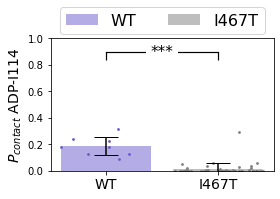

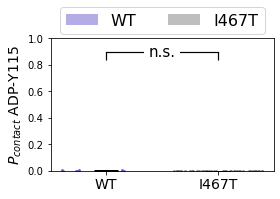

3 this is significant: (786, 126) 1.7480736637769722e-11 variance is unequal


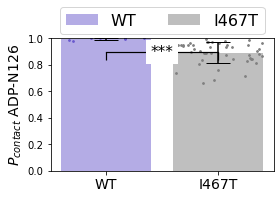

4 this is significant: (786, 127) 4.456492329260329e-14 equal variance


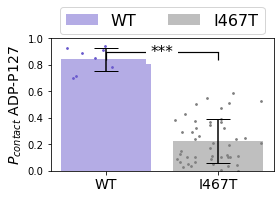

5 this is significant: (786, 128) 0.0002938834715167806 variance is unequal


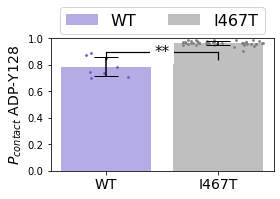

6 this is significant: (786, 129) 1.1217818199420024e-11 variance is unequal


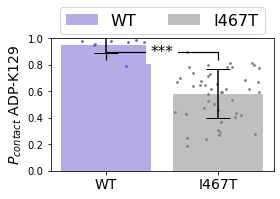

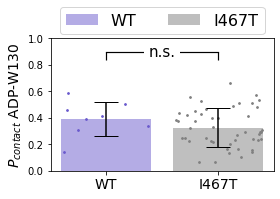

8 this is significant: (786, 131) 3.201457934645715e-12 variance is unequal


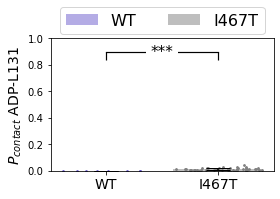

9 this is significant: (786, 134) 4.939485426221806e-17 equal variance


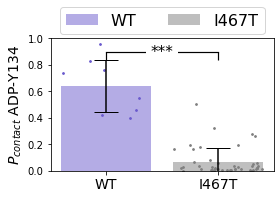

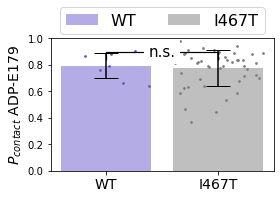

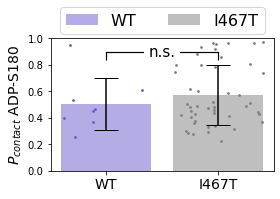

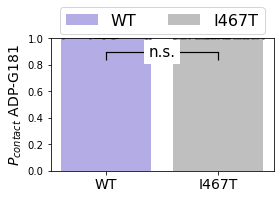

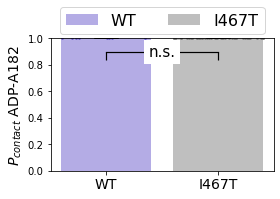

16 this is significant: (786, 185) 0.015892745915501376 variance is unequal


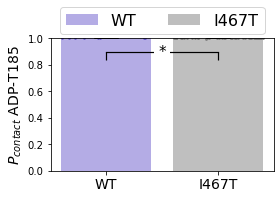

17 this is significant: (786, 186) 5.861505778719367e-06 variance is unequal


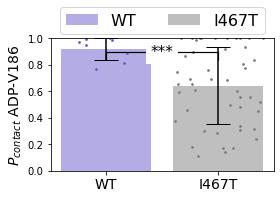

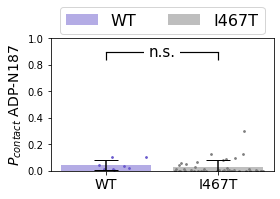

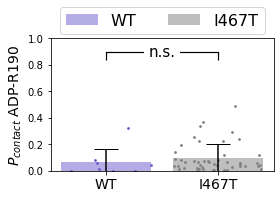

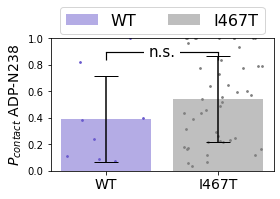

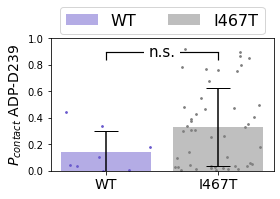

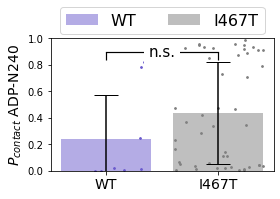

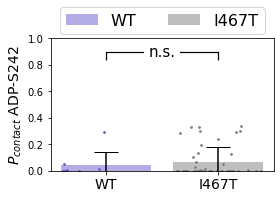

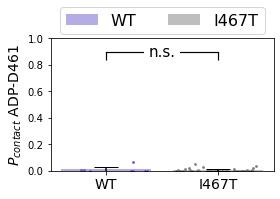

27 this is significant: (786, 679) 0.0015798123543407185 equal variance


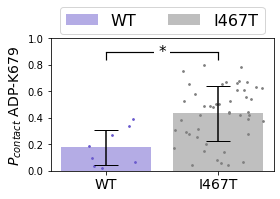

In [106]:
set1 = [786] # ADP
set2 = [114,115,124,126,127,128,129,130,131,134,179,180,181,182,183,184,185,186,187,190,238,239,240,241,242,461,464,679]#,788]
set2_names = []
pairs = list(itertools.product(set1, set2))

# load in data from WT and mutant
wt_data = "/Users/ssolieva/Desktop/bowman_lab/MSM_I467T/contacts_data/786_neighbors_binarized_distances_wildtype.npy"
i467t_data = "/Users/ssolieva/Desktop/bowman_lab/MSM_I467T/contacts_data/786_neighbors_binarized_distances_I467T.npy"
WT = np.load(f"{wt_data}", allow_pickle=True)
I467T = np.load(f"{i467t_data}", allow_pickle=True)

# exclude 2 trajectories with different starting conformations
filtered_wt_data = []
for i in [0,2,3,4,5,6,7,8]:
    filtered_wt_data.append(WT[i]) 

# conduct t-test to compare WT and mutant
for i in range(len(pairs)):
    contact_number = i
    res = WT_pdb.topology.select(f'residue {pairs[contact_number][1]} and name CA')[0]
    rescode = WT_pdb.topology.atom(res).residue.code
    pvalue = t_test(filtered_wt_data, I467T, contact_number, pairs)
    #print(i, pairs[i], rescode, pvalue)
    if isinstance(pvalue, float) == True or isinstance(pvalue, int) == True:
        probability_graph_styleA(filtered_wt_data, I467T, contact_number, pairs, pvalue, rescode)

## Further look into ADP-Y134:

In [86]:
probability_means(filtered_wt_data, I467T, 9, pairs)

(786, 134)
WT average: 0.6392795946729757
I467T average: 0.06584804440736801


# 2. Contacts between A loop and H helix

1 this is significant: (126, 181) 0.02312342542236144 equal variance


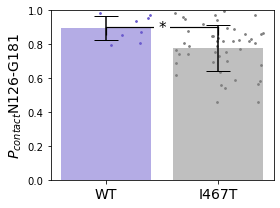

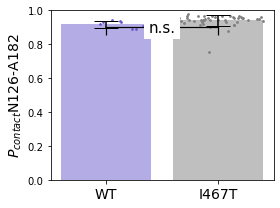

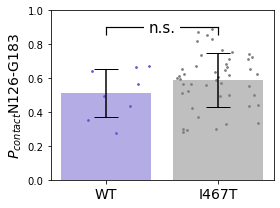

6 this is significant: (126, 186) 1.5976037879128813e-05 variance is unequal


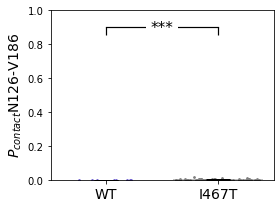

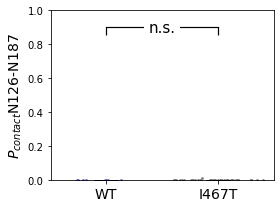

17 this is significant: (127, 186) 0.014619301138618153 variance is unequal


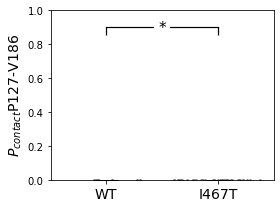

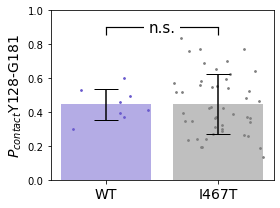

24 this is significant: (128, 182) 0.0003511479991327215 variance is unequal


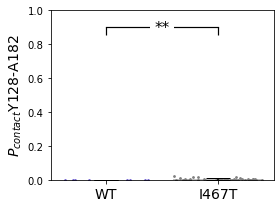

50 this is significant: (130, 186) 0.0011254139929785499 variance is unequal


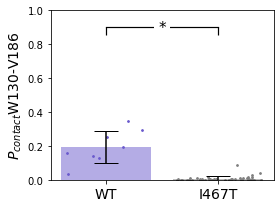

54 this is significant: (130, 190) 0.00018233509518473563 equal variance


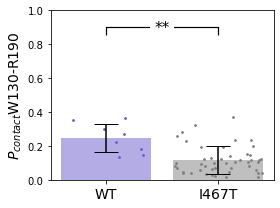

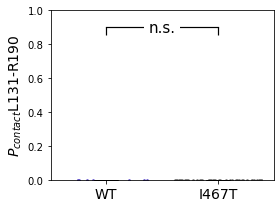

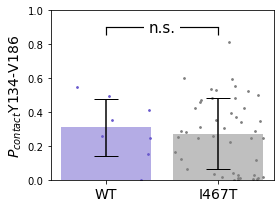

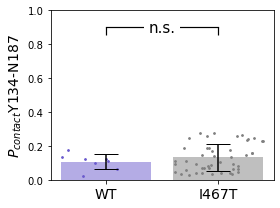

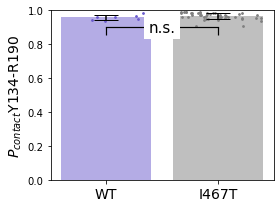

In [95]:
set1 = np.arange(126,135)
set2 = np.arange(180,191)
pairs = list(itertools.product(set1, set2))

# load in data from WT and mutant
wt_data = "/Users/ssolieva/Desktop/bowman_lab/MSM_I467T/contacts_data/A_loop_HF_helix_binarized_distances_wildtype.npy"
i467t_data = "/Users/ssolieva/Desktop/bowman_lab/MSM_I467T/contacts_data/A_loop_HF_helix_binarized_distances_I467T.npy"
WT = np.load(f"{wt_data}", allow_pickle=True)
I467T = np.load(f"{i467t_data}", allow_pickle=True)

# exclude 2 trajectories with different starting conformations
filtered_wt_data = []
for i in [0,2,3,4,5,6,7,8]:
    filtered_wt_data.append(WT[i]) 

# conduct t-test to compare WT and mutant
for i in range(len(pairs)):
    contact_number = i
    res1 = WT_pdb.topology.select(f'residue {pairs[contact_number][0]} and name CA')[0]
    res2 = WT_pdb.topology.select(f'residue {pairs[contact_number][1]} and name CA')[0]
    rescode1 = WT_pdb.topology.atom(res1).residue.code
    rescode2 = WT_pdb.topology.atom(res2).residue.code
    pvalue = t_test(filtered_wt_data, I467T, contact_number, pairs)
    #print(i, pairs[i], rescode, pvalue)
    if isinstance(pvalue, float) == True or isinstance(pvalue, int) == True:
        probability_graph_styleB(filtered_wt_data, I467T, contact_number, pairs, pvalue, rescode1, rescode2)

## Further look into W130-V186:

In [96]:
probability_means(filtered_wt_data, I467T, 50, pairs)

(130, 186)
WT average: 0.19397876185138094
I467T average: 0.006621641524923479


# 3. Aggregate simulation times

In [105]:
print("WT")
print(f"> number of trajectories: \t {len(filtered_wt_data)}")
print(f"> number of frames: \t\t {len(np.concatenate(filtered_wt_data))}")

print("\nI467T")
print(f"> number of trajectories: \t {len(I467T)}")
print(f"> number of frames: \t\t {len(np.concatenate(I467T))}")

WT
> number of trajectories: 	 8
> number of frames: 		 523436

I467T
> number of trajectories: 	 47
> number of frames: 		 2387145
